# Develop an Autoencoder forhandwritten digits dataset MNIST.

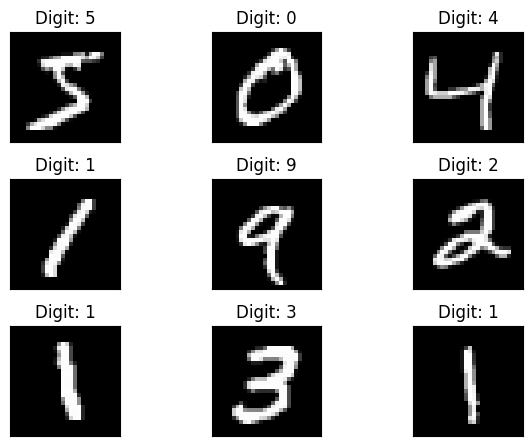

X_train shape: (60000, 28, 28, 1)


C:\Python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 121ms/step - accuracy: 0.1297 - loss: 2.2926 - val_accuracy: 0.3605 - val_loss: 2.2462
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.2483 - loss: 2.2381 - val_accuracy: 0.5001 - val_loss: 2.1740
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.3448 - loss: 2.1696 - val_accuracy: 0.5717 - val_loss: 2.0784
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.4299 - loss: 2.0757 - val_accuracy: 0.6498 - val_loss: 1.9512
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.4943 - loss: 1.9533 - val_accuracy: 0.7107 - val_loss: 1.7877
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 114ms/step - accuracy: 0.5462 - loss: 1.8077 - val_accuracy: 0.7416 - val_loss: 1.5979
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.5847 - loss: 1.6402 - val_accuracy: 0.7667 - val_loss: 1.4006
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.6157 - loss: 1

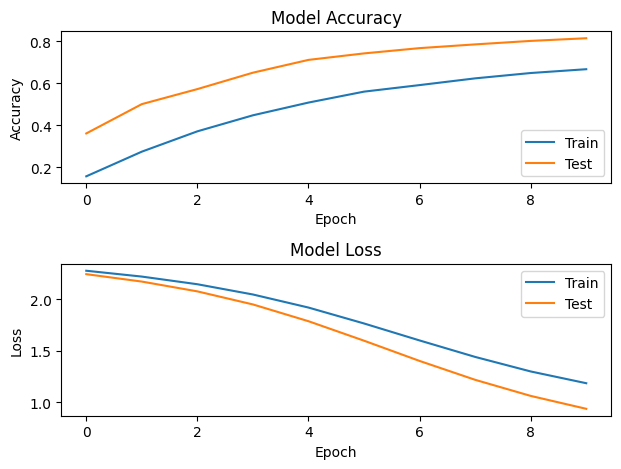

Saved model to disk


In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential # Import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense # Import necessary layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load dataset from local file
(X_train, y_train), (X_test, y_test) = mnist.load_data(path='mnist.npz')

#(X_train, y_train), (X_test, y_test) = mnist.load_data()
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()
#reshaping
#this assumes our data format
#For 3D data,"channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=28, 28
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :)
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=num_epoch,
    verbose=1,
    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904
fig=plt.figure()
plt.subplot(2, 1, 1)
plt.plot(model_log.history['accuracy']) # Updated to 'accuracy'
plt.plot(model_log.history['val_accuracy']) # Updated to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(2, 1, 2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.tight_layout()
plt.show()
model_digit_json=model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# Serialize weights to HDF5
model.save_weights("model_digit.weights.h5") # Corrected filename
print("Saved model to disk")
